In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

import nbimporter
from sklearn.metrics import silhouette_samples, silhouette_score

from preprocessamento import *
from geracaoDeTabelas import gerar_todos_os_graficos
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA, LatentDirichletAllocation as LDA

from mpl_toolkits import mplot3d

Importing Jupyter notebook from preprocessamento.ipynb
Importing Jupyter notebook from geracaoDeTabelas.ipynb


In [2]:
dados_2015 = pd.read_csv('../arquivos/2015.csv')
dados_2016 = pd.read_csv('../arquivos/2016.csv')

In [3]:
dados_csv = pd.concat([dados_2015, dados_2016])

/home/igor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [4]:
dados_csv.shape

(466, 55)

In [5]:
y_2015 = gerar_target(dados_2015)
y_2016 = gerar_target(dados_2016)

y = pd.concat([y_2015, y_2016])

In [7]:
df_2015 = preprocessar(dados_2015)
df_2016 = preprocessar(dados_2016)

frames = [df_2015, df_2016]

data_frame = pd.concat(frames)

In [8]:
data_frame.columns

Index(['filhos', 'afinidade_linguagens', 'afinidade_humanas',
       'afinidade_matematica', 'afinidade_natureza', 'motivacao_curso',
       'tarefa_durante_curso', 'realizacao_profissional',
       'concluir_curso_nessa_instituicao', 'nao_mudaria_de_curso'],
      dtype='object')

In [14]:
lista = ['Tem filhos?', 'Indique em que medida você tem afinidade com as áreas a seguir: [Ciências da natureza e suas tecnologias.]',
 'Indique em que medida você tem afinidade com as áreas a seguir: [Ciências humanas e suas tecnologias.]',
 'Indique em que medida você tem afinidade com as áreas a seguir: [Linguagens, códigos e suas tecnologias.]',
 'Indique em que medida você tem afinidade com as áreas a seguir: [Matemática e suas tecnologias.]']


In [16]:
dados = dados_csv[lista]

In [18]:
dados

,Tem filhos?,Indique em que medida você tem afinidade com as áreas a seguir: [Ciências da natureza e suas tecnologias.],Indique em que medida você tem afinidade com as áreas a seguir: [Ciências humanas e suas tecnologias.],"Indique em que medida você tem afinidade com as áreas a seguir: [Linguagens, códigos e suas tecnologias.]",Indique em que medida você tem afinidade com as áreas a seguir: [Matemática e suas tecnologias.]
0,Não,Muita afinidade,Boa afinidade,Boa afinidade,Boa afinidade
1,Não,Muita afinidade,Alguma afinidade,Alguma afinidade,Muita afinidade
2,Não,Boa afinidade,Alguma afinidade,Pouquíssima afinidade,Muita afinidade
3,Não,Alguma afinidade,Muita afinidade,Muita afinidade,Boa afinidade
4,Não,Muita afinidade,Boa afinidade,Boa afinidade,Muita afinidade
5,Não,Boa afinidade,Boa afinidade,Alguma afinidade,Muita afinidade
6,Não,Boa afinidade,Boa afinidade,Boa afinidade,Boa afinidade
7,Não,Alguma afinidade,Alguma afinidade,Pouquíssima afinidade,Boa afinidade
8,Não,Alguma afinidade,Alguma afinidade,Boa afinidade,Muita afinidade
9,Não,Boa afinidade,Alguma afinidade,Boa afinidade,Muita afinidade


In [21]:
def gerar_graficos(dados, coluna):
    data = dados[coluna].value_counts()
    data.plot(kind='barh', title=coluna,figsize=(17, 9))
    print(data)
    plt.savefig('../imagens/2015_2016/todos/' + coluna + '.jpg')
    
def gerar_todos_graficos(cluster):
    for coluna in cluster.columns:
        gerar_graficos(cluster, coluna)

Não    449
Sim     17
Name: Tem filhos?, dtype: int64
Boa afinidade            220
Alguma afinidade         139
Muita afinidade           61
Pouquíssima afinidade     46
Name: Indique em que medida você tem afinidade com as áreas a seguir: [Ciências da natureza e suas tecnologias.], dtype: int64
Boa afinidade            225
Alguma afinidade         124
Muita afinidade           89
Pouquíssima afinidade     28
Name: Indique em que medida você tem afinidade com as áreas a seguir: [Ciências humanas e suas tecnologias.], dtype: int64
Boa afinidade            210
Alguma afinidade         144
Muita afinidade           74
Pouquíssima afinidade     38
Name: Indique em que medida você tem afinidade com as áreas a seguir: [Linguagens, códigos e suas tecnologias.], dtype: int64
Boa afinidade            180
Muita afinidade          137
Alguma afinidade         110
Pouquíssima afinidade     39
Name: Indique em que medida você tem afinidade com as áreas a seguir: [Matemática e suas tecnologias.], dt

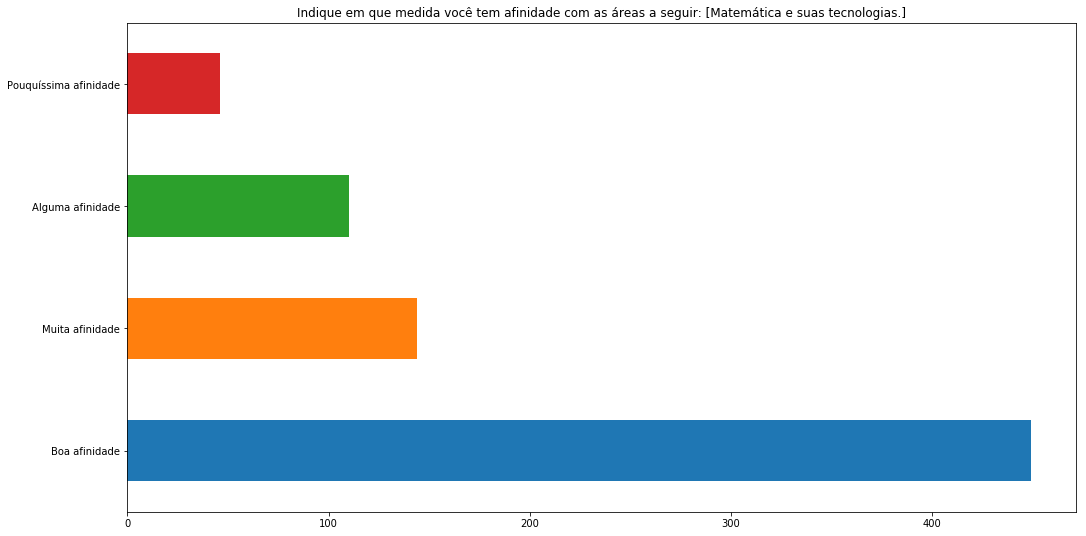

In [23]:
gerar_todos_graficos(dados)